In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
train = pd.read_csv('data/train_Av_Jh.csv')
test = pd.read_csv('data/test_Av_Jh.csv')

In [4]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [5]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [6]:
train.shape,test.shape

((26496, 8), (8568, 7))

In [7]:
train.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

In [8]:
train['var2'].unique()

array(['A', 'B', 'C'], dtype=object)

In [9]:
train['temperature'].unique()

array([-11.4, -12.1, -12.9, -10.7, -13.6, -10. ,  -7.1,  -7.9,  -5.7,
        -6.4,  -3.6,  -5. ,  -4.3,  -9.3,  -8.6,  -2.9,  -2.1, -14.3,
        -0.7,  -1.4, -15. ,   0. ,   1.4,   2.9,   3.6,   0.7,   2.1,
         4.3,   5.7,   5. ,   7.9,   6.4,   9.3,   8.6,   7.1,  10.7,
        11.4,  12.1,  12.9,  10. ,  14.3,  13.6,  15. ,  15.7,  17.1,
        18.6,  16.4,  17.9,  19.3,  20. ,  22.1,  21.4,  20.7, -15.7,
       -16.4, -17.1,  23.6,  22.9,   6.2,   1.7])

In [10]:
train.dtypes

ID                           int64
datetime                    object
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object

In [11]:
train['datetime'] = pd.to_datetime(train.datetime)
test['datetime'] = pd.to_datetime(test.datetime)

In [12]:
"""X = train.drop('electricity_consumption',axis=1)
Y = train['electricity_consumption']
X['label']='train'
test['label']='test'
train = pd.concat([X,test],sort=False)"""

"X = train.drop('electricity_consumption',axis=1)\nY = train['electricity_consumption']\nX['label']='train'\ntest['label']='test'\ntrain = pd.concat([X,test],sort=False)"

In [13]:
train['label'] = 'train'

In [14]:
test['label']='test'
train = pd.concat([train,test],sort=False)

In [15]:
train.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [16]:
train.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption', 'label'],
      dtype='object')

In [17]:
"""from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
scaler = MinMaxScaler(feature_range=(0,1))
column = ['temperature', 'var1', 'pressure', 'windspeed','var2']
for col in column:
    if col!='var2' :
        train[col]=scaler.fit_transform(train[[col]])"""

"from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder\nscaler = MinMaxScaler(feature_range=(0,1))\ncolumn = ['temperature', 'var1', 'pressure', 'windspeed','var2']\nfor col in column:\n    if col!='var2' :\n        train[col]=scaler.fit_transform(train[[col]])"

In [18]:
train.insert(1,'date',train['datetime'].apply(lambda x:x.date()))

In [19]:
train.head()

,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [20]:
train['date'] = pd.to_datetime(train['date'])

In [21]:
train.head()

,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [22]:
train.insert(0,'month_start',train['date'].apply( lambda x: 1 if x.is_month_start else 0 ) )
train.insert(0,'month_end',train['date'].apply( lambda x: 1 if x.is_month_end else 0 ) )

In [23]:
train.insert(0,'month',train['date'].apply(lambda x:x.month))
train.insert(0,'day',train['date'].apply(lambda x:x.day))

In [24]:
train.insert(0,'week_start',train['day'].apply( lambda x: 1 if x == 0 or x ==1 else 0 ) )
train.insert(0,'week_end',train['day'].apply( lambda x: 1 if x == 5 or x ==6 else 0 ) )

In [25]:
train.insert(0,'quarter_start',train['date'].apply( lambda x: 1 if x.is_quarter_start else 0 ) )
train.insert(0,'quarter_end',train['date'].apply( lambda x: 1 if x.is_quarter_end else 0 ) )

In [26]:
train.insert(0,'year_start',train['date'].apply( lambda x: 1 if x.is_year_start else 0 ) )
train.insert(0,'year_end',train['date'].apply( lambda x: 1 if x.is_year_end else 0 ) )

In [27]:
train.head()

,year_end,year_start,quarter_end,quarter_start,week_end,week_start,day,month,month_end,month_start,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,0,0,0,1,0,1,1,7,0,1,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,0,0,0,1,0,1,1,7,0,1,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,0,0,0,1,0,1,1,7,0,1,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,0,0,0,1,0,1,1,7,0,1,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,0,0,0,1,0,1,1,7,0,1,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [28]:
#train.drop(['month_day'],axis=1,inplace=True)

In [29]:
train.insert(0,'time',train['datetime'].apply(lambda x:x.time()))

In [30]:
train.head()

,time,year_end,year_start,quarter_end,quarter_start,week_end,week_start,day,month,month_end,...,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,00:00:00,0,0,0,1,0,1,1,7,0,...,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,01:00:00,0,0,0,1,0,1,1,7,0,...,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,02:00:00,0,0,0,1,0,1,1,7,0,...,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,03:00:00,0,0,0,1,0,1,1,7,0,...,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,04:00:00,0,0,0,1,0,1,1,7,0,...,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [31]:
train.insert(0,'hour',train['time'].apply(lambda x:x.hour))

In [32]:
train.insert(0,'year',train['date'].apply(lambda x:x.year))

In [33]:
train.insert(4,'day_of_week',train['date'].apply(lambda x:x.weekday()))

In [34]:
train.head()

,year,hour,time,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,week_start,...,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,2013,0,00:00:00,0,0,0,0,1,0,1,...,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,2013,1,01:00:00,0,0,0,0,1,0,1,...,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,2013,2,02:00:00,0,0,0,0,1,0,1,...,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,2013,3,03:00:00,0,0,0,0,1,0,1,...,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,2013,4,04:00:00,0,0,0,0,1,0,1,...,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [35]:
train.insert(0,'day_of_year',train['datetime'].apply(lambda x: x.dayofyear))

In [36]:
train.head()

,day_of_year,year,hour,time,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,...,ID,date,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,label
0,182,2013,0,00:00:00,0,0,0,0,1,0,...,0,2013-07-01,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,train
1,182,2013,1,01:00:00,0,0,0,0,1,0,...,1,2013-07-01,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,train
2,182,2013,2,02:00:00,0,0,0,0,1,0,...,2,2013-07-01,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,train
3,182,2013,3,03:00:00,0,0,0,0,1,0,...,3,2013-07-01,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,train
4,182,2013,4,04:00:00,0,0,0,0,1,0,...,4,2013-07-01,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,train


In [37]:
#ratio based features

In [38]:
train['var1_press_ratio'] = train['pressure']/train['var1']
train['var1_temp_ratio'] = train['temperature']/train['var1']
train['var1_windspeed_ratio'] = train['windspeed']/train['var1']

In [39]:
train['var1_var2'] = train.groupby(['year','month','day','var2'])['var1'].transform('sum')

In [40]:
train['datetime_interval'] = pd.cut(train['hour'], bins=4, labels=False)

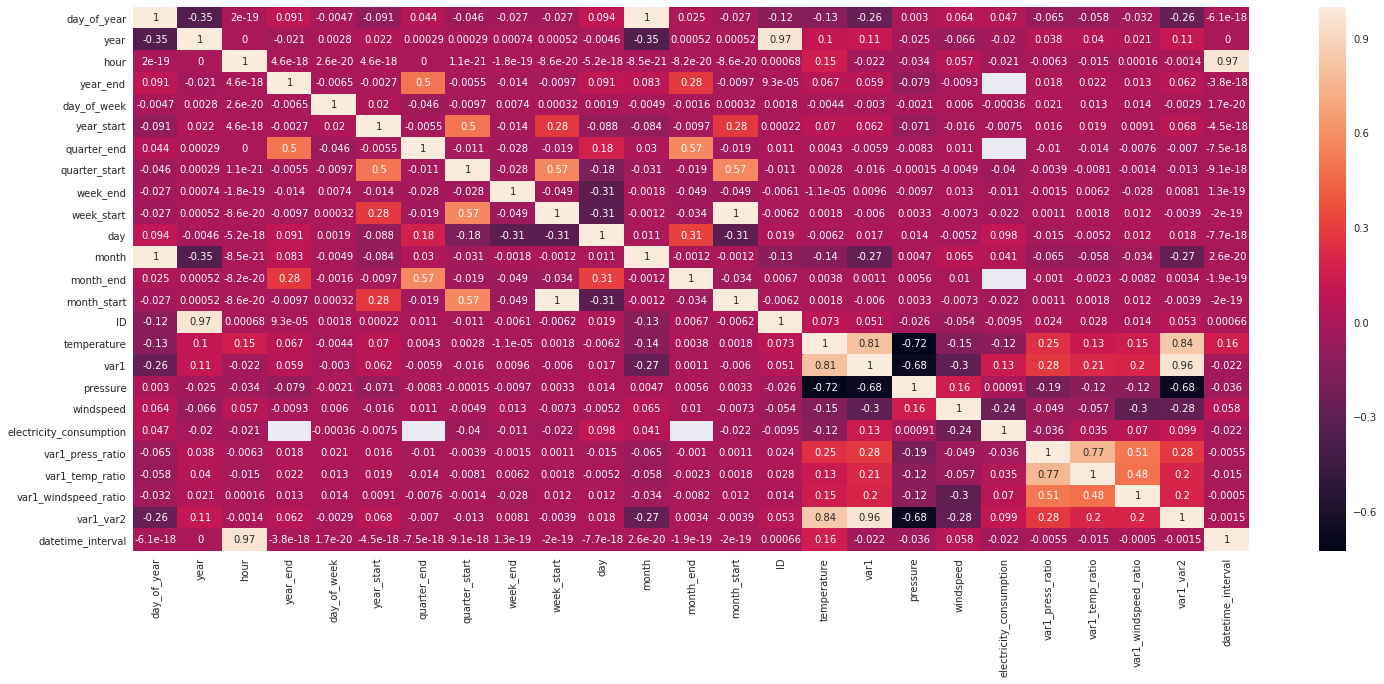

In [41]:
plt.figure(figsize=(25,10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [42]:
train.shape

(35064, 30)

In [43]:
day_df = train.groupby(['date']).agg({'temperature':'mean',\
                          'pressure':'mean',\
                          'var1':'mean',\
                          'windspeed':'mean',\
                          'var2':'nunique',\
                          'electricity_consumption':['sum','mean']}).reset_index()

In [46]:
day_df.head()

,date_,temperature_mean,pressure_mean,var1_mean,windspeed_mean,var2_nunique,electricity_consumption_sum,electricity_consumption_mean
0,2013-07-01,-8.741667,1003.208333,-17.016667,150.613750,1,5136.0,214.000
1,2013-07-02,-7.566667,1006.375000,-15.687500,10.603125,1,5502.0,229.250
2,2013-07-03,-8.091667,1000.416667,-13.845833,2.790208,1,9141.0,380.875
3,2013-07-04,-7.679167,996.916667,-14.233333,17.119792,1,7104.0,296.000
4,2013-07-05,-7.500000,1001.916667,-17.654167,178.988333,1,4953.0,206.375


In [45]:
day_df.columns = ['_'.join(x) if len(x)>1 else x[0] for x in day_df.columns ]

In [47]:
day_df.head()

,date_,temperature_mean,pressure_mean,var1_mean,windspeed_mean,var2_nunique,electricity_consumption_sum,electricity_consumption_mean
0,2013-07-01,-8.741667,1003.208333,-17.016667,150.613750,1,5136.0,214.000
1,2013-07-02,-7.566667,1006.375000,-15.687500,10.603125,1,5502.0,229.250
2,2013-07-03,-8.091667,1000.416667,-13.845833,2.790208,1,9141.0,380.875
3,2013-07-04,-7.679167,996.916667,-14.233333,17.119792,1,7104.0,296.000
4,2013-07-05,-7.500000,1001.916667,-17.654167,178.988333,1,4953.0,206.375


In [48]:
day_df['day'] = pd.to_datetime(day_df['date_']).dt.day
day_df['month'] = pd.to_datetime(day_df['date_']).dt.month
day_df['year'] = pd.to_datetime(day_df['date_']).dt.year

In [49]:
day_df['lag_1'] = day_df.groupby(['month','year'])['electricity_consumption_mean'].shift(1)

In [50]:
day_df['dt_date'] = pd.to_datetime(day_df['date_'])

In [51]:
day_df.sort_values(by=['dt_date'], inplace=True)

In [52]:
LAG_COL = []
for i in range(2,23):
  col_name = 'lag_'+str(i)
  temp = day_df.groupby(['month','year'])['electricity_consumption_mean'].\
                      rolling(window =i, min_periods=1).mean().reset_index()
  temp.sort_values(by=['year','month'], inplace=True)
  temp['new_mean'] = temp.groupby(['month','year'])['electricity_consumption_mean'].shift(1)
  temp = temp.set_index('level_2')
  day_df[col_name] = temp['new_mean']
  LAG_COL.append(col_name)

In [53]:
req_merge = day_df[['temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'electricity_consumption_mean', 
       'day', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22','date_']]

In [54]:
req_merge.head()

,temperature_mean,pressure_mean,var1_mean,windspeed_mean,var2_nunique,electricity_consumption_mean,day,month,year,lag_1,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,date_
0,-8.741667,1003.208333,-17.016667,150.613750,1,214.000,1,7,2013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01
1,-7.566667,1006.375000,-15.687500,10.603125,1,229.250,2,7,2013,214.000,...,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,2013-07-02
2,-8.091667,1000.416667,-13.845833,2.790208,1,380.875,3,7,2013,229.250,...,221.625000,221.625000,221.625000,221.625000,221.625000,221.625000,221.625000,221.625000,221.625000,2013-07-03
3,-7.679167,996.916667,-14.233333,17.119792,1,296.000,4,7,2013,380.875,...,274.708333,274.708333,274.708333,274.708333,274.708333,274.708333,274.708333,274.708333,274.708333,2013-07-04
4,-7.500000,1001.916667,-17.654167,178.988333,1,206.375,5,7,2013,296.000,...,280.031250,280.031250,280.031250,280.031250,280.031250,280.031250,280.031250,280.031250,280.031250,2013-07-05


In [55]:
train_1 = pd.merge(train, req_merge, left_on = ['date'], right_on=['date_'])

In [56]:
train.columns

Index(['day_of_year', 'year', 'hour', 'time', 'year_end', 'day_of_week',
       'year_start', 'quarter_end', 'quarter_start', 'week_end', 'week_start',
       'day', 'month', 'month_end', 'month_start', 'ID', 'date', 'datetime',
       'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'label', 'var1_press_ratio',
       'var1_temp_ratio', 'var1_windspeed_ratio', 'var1_var2',
       'datetime_interval'],
      dtype='object')

In [57]:
req_merge.columns

Index(['temperature_mean', 'pressure_mean', 'var1_mean', 'windspeed_mean',
       'var2_nunique', 'electricity_consumption_mean', 'day', 'month', 'year',
       'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15',
       'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22',
       'date_'],
      dtype='object')

In [59]:
train_1.head()

,day_of_year,year_x,hour,time,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,date_
0,182,2013,0,00:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01
1,182,2013,1,01:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01
2,182,2013,2,02:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01
3,182,2013,3,03:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01
4,182,2013,4,04:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-01


In [60]:
train_1.columns

Index(['day_of_year', 'year_x', 'hour', 'time', 'year_end', 'day_of_week',
       'year_start', 'quarter_end', 'quarter_start', 'week_end', 'week_start',
       'day_x', 'month_x', 'month_end', 'month_start', 'ID', 'date',
       'datetime', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'label', 'var1_press_ratio',
       'var1_temp_ratio', 'var1_windspeed_ratio', 'var1_var2',
       'datetime_interval', 'temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'electricity_consumption_mean',
       'day_y', 'month_y', 'year_y', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'date_'],
      dtype='object')

In [61]:
train_1['press_ratio'] = train_1['pressure']/train_1['pressure_mean']
train_1['temp_ratio'] = train_1['temperature']/train_1['temperature_mean']
train_1['wins_ratio'] = train_1['windspeed']/train_1['windspeed_mean']
train_1['var1_ratio'] = train_1['var1']/train_1['var1_mean']

In [62]:
train_2 = train_1.copy()

In [63]:
train_2.columns

Index(['day_of_year', 'year_x', 'hour', 'time', 'year_end', 'day_of_week',
       'year_start', 'quarter_end', 'quarter_start', 'week_end', 'week_start',
       'day_x', 'month_x', 'month_end', 'month_start', 'ID', 'date',
       'datetime', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'label', 'var1_press_ratio',
       'var1_temp_ratio', 'var1_windspeed_ratio', 'var1_var2',
       'datetime_interval', 'temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'electricity_consumption_mean',
       'day_y', 'month_y', 'year_y', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'date_', 'press_ratio',
       'temp_ratio', 'wins_ratio', 'var1_ratio'],
      dtype='object')

In [64]:
train_2.drop(['datetime','date','date_','electricity_consumption_mean','day_y','month_y','year_y'], axis=1, inplace=True)

In [65]:
train_2.rename(columns={'year_x':'year','month_x':'month','day_x':'day'},inplace=True)

In [66]:
train_2.head()

,day_of_year,year,hour,time,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,press_ratio,temp_ratio,wins_ratio,var1_ratio
0,182,2013,0,00:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999792,1.304099,3.797196,1.004897
1,182,2013,1,01:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992815,1.384175,3.817978,1.134182
2,182,2013,2,02:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.996802,1.475691,3.840519,1.175318
3,182,2013,3,03:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.991818,1.304099,3.868040,1.004897
4,182,2013,4,04:00:00,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.001786,1.304099,3.894731,1.134182


In [67]:
train_2.drop(['time'],axis=1,inplace=True)

In [68]:
train_2

,day_of_year,year,hour,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,week_start,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,press_ratio,temp_ratio,wins_ratio,var1_ratio
0,182,2013,0,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.999792,1.304099,3.797196,1.004897
1,182,2013,1,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.992815,1.384175,3.817978,1.134182
2,182,2013,2,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.996802,1.475691,3.840519,1.175318
3,182,2013,3,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.991818,1.304099,3.868040,1.004897
4,182,2013,4,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.001786,1.304099,3.894731,1.134182
5,182,2013,5,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.009760,1.224023,0.018524,1.134182
6,182,2013,6,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.002783,1.555767,0.029081,1.004897
7,182,2013,7,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.993812,1.304099,0.050693,1.051910
8,182,2013,8,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.008764,1.224023,0.080039,1.093046
9,182,2013,9,0,0,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.998796,1.143947,0.119345,0.963761


In [69]:
bin_labels_5 = ['Winter', 'Spring', 'Summer', 'Fall']
train_2['season'] = pd.cut(train_2['month'],bins=[1,2, 5,8,11],labels=bin_labels_5)
train_2['season'] = train_2['season'].fillna('Winter')

In [70]:
bin_labels_3 = ['beg', 'mid', 'end']
train_2['month_time'] = pd.cut(train_2['month'],bins=[0,7,24,31],labels=bin_labels_3)

In [71]:
bin_labels_2 = ['weekdays', 'weekend']
train_2['week_time'] = pd.cut(train_2['day_of_week'],bins=[-1,4,6],labels=bin_labels_2)

In [72]:
train_2.head()

,day_of_year,year,hour,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,week_start,...,lag_20,lag_21,lag_22,press_ratio,temp_ratio,wins_ratio,var1_ratio,season,month_time,week_time
0,182,2013,0,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.999792,1.304099,3.797196,1.004897,Summer,beg,weekdays
1,182,2013,1,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.992815,1.384175,3.817978,1.134182,Summer,beg,weekdays
2,182,2013,2,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.996802,1.475691,3.840519,1.175318,Summer,beg,weekdays
3,182,2013,3,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.991818,1.304099,3.868040,1.004897,Summer,beg,weekdays
4,182,2013,4,0,0,0,0,1,0,1,...,NaN,NaN,NaN,1.001786,1.304099,3.894731,1.134182,Summer,beg,weekdays


In [73]:
# train_final = train[train['label']=='train']

In [74]:
# train_final.shape

In [75]:
# sns.distplot(train['electricity_consumption'])

In [76]:
# train.groupby(['month'])[['electricity_consumption']].mean().plot()

In [77]:
# train.groupby(['day'])[['electricity_consumption']].mean().plot()

In [78]:
# train.groupby(['hour'])[['electricity_consumption']].mean().plot()

In [79]:
# train.groupby(['day_of_week'])[['electricity_consumption']].mean().plot()

In [80]:
# train.groupby(['month'])[['temperature']].mean().plot()

In [81]:
# train.groupby(['temperature'])[['electricity_consumption']].mean().plot()

In [82]:
# train.head(2)

In [83]:
# train.dtypes

In [84]:
# sns.scatterplot(train['windspeed'],train['electricity_consumption'])

In [85]:
# sns.scatterplot(train['pressure'],train['electricity_consumption'])

In [86]:
# sns.scatterplot(train['temperature'],train['electricity_consumption'])
# 

In [87]:
train.head(2)

,day_of_year,year,hour,time,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,...,pressure,windspeed,var2,electricity_consumption,label,var1_press_ratio,var1_temp_ratio,var1_windspeed_ratio,var1_var2,datetime_interval
0,182,2013,0,00:00:00,0,0,0,0,1,0,...,1003.0,571.91,A,216.0,train,-58.654971,0.666667,-33.445029,-408.4,0
1,182,2013,1,01:00:00,0,0,0,0,1,0,...,996.0,575.04,A,210.0,train,-51.606218,0.626943,-29.794819,-408.4,0


In [88]:
train_2['day'].value_counts()

16    1152
15    1152
2     1152
3     1152
4     1152
5     1152
6     1152
7     1152
8     1152
9     1152
10    1152
11    1152
12    1152
13    1152
14    1152
1     1152
17    1152
18    1152
19    1152
20    1152
21    1152
22    1152
23    1152
24    1152
25    1152
26    1152
27    1152
28    1152
29    1080
30    1056
31     672
Name: day, dtype: int64

In [89]:
# tr = train.copy()
# train_final = tr[tr['label']=='train']
# train_final.shape


In [90]:
# col=['var2','season','month_time', 'week_time']
# lbl = LabelEncoder()
# for c in col:
#     if c!='var2':
#         tr[c] = lbl.fit_transform(tr[c])
#     else:
#         tr[c] = lbl.fit_transform(tr[c])
#         dumy = pd.get_dummies(tr[c],prefix=c)
#         tr = pd.concat([tr,dumy],axis=1)
#         tr = tr.drop(c,axis=1)
    
# dumy = pd.get_dummies(tr['year'],prefix='year')
# tr = pd.concat([tr,dumy],axis=1)
# tr = tr.drop('year',axis=1)

In [91]:

"""train_final = tr[tr['label']=='train']
train_final.shape"""

"train_final = tr[tr['label']=='train']\ntrain_final.shape"

In [92]:
train_2.head()

,day_of_year,year,hour,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,week_start,...,lag_20,lag_21,lag_22,press_ratio,temp_ratio,wins_ratio,var1_ratio,season,month_time,week_time
0,182,2013,0,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.999792,1.304099,3.797196,1.004897,Summer,beg,weekdays
1,182,2013,1,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.992815,1.384175,3.817978,1.134182,Summer,beg,weekdays
2,182,2013,2,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.996802,1.475691,3.840519,1.175318,Summer,beg,weekdays
3,182,2013,3,0,0,0,0,1,0,1,...,NaN,NaN,NaN,0.991818,1.304099,3.868040,1.004897,Summer,beg,weekdays
4,182,2013,4,0,0,0,0,1,0,1,...,NaN,NaN,NaN,1.001786,1.304099,3.894731,1.134182,Summer,beg,weekdays


In [93]:
from sklearn.preprocessing import LabelEncoder
col=['var2','season','month_time', 'week_time']
lbl = LabelEncoder()
for c in col:
    if c!='var2':
        train_2[c] = lbl.fit_transform(train_2[c])
    else:
        train_2[c] = lbl.fit_transform(train_2[c])
        dumy = pd.get_dummies(train_2[c],prefix=c)
        train_2 = pd.concat([train_2,dumy],axis=1)
        train_2 = train_2.drop(c,axis=1)
    
dumy = pd.get_dummies(train_2['year'],prefix='year')
train_2 = pd.concat([train_2,dumy],axis=1)
train_2 = train_2.drop('year',axis=1)

In [95]:
train_2.head()

,day_of_year,hour,year_end,day_of_week,year_start,quarter_end,quarter_start,week_end,week_start,day,...,month_time,week_time,var2_0,var2_1,var2_2,year_2013,year_2014,year_2015,year_2016,year_2017
0,182,0,0,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
1,182,1,0,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,182,2,0,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,182,3,0,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,182,4,0,0,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0


In [96]:
columns=['day','month','hour','day_of_week','month_time','season','week_time']
for col in columns:
    train_2[col+'_sin']=np.sin((2*np.pi*train_2[col])/max(train_2[col]))
    train_2[col+'_cos']=np.cos((2*np.pi*train_2[col])/max(train_2[col]))
train_2=train_2.drop(columns,axis=1)

In [97]:
train_2.head()

,day_of_year,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,ID,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_time_sin,month_time_cos,season_sin,season_cos,week_time_sin,week_time_cos
0,182,0,0,0,1,0,1,0,1,0,...,0.000000,1.000000,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
1,182,0,0,0,1,0,1,0,1,1,...,0.269797,0.962917,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
2,182,0,0,0,1,0,1,0,1,2,...,0.519584,0.854419,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
3,182,0,0,0,1,0,1,0,1,3,...,0.730836,0.682553,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
4,182,0,0,0,1,0,1,0,1,4,...,0.887885,0.460065,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0


In [99]:
LOG_COL = ['windspeed','windspeed_mean', 'pressure', 'pressure_mean']

In [100]:
train_2[LOG_COL] = np.log(train_2[LOG_COL])

In [101]:
train_2.head()

,day_of_year,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,ID,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_time_sin,month_time_cos,season_sin,season_cos,week_time_sin,week_time_cos
0,182,0,0,0,1,0,1,0,1,0,...,0.000000,1.000000,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
1,182,0,0,0,1,0,1,0,1,1,...,0.269797,0.962917,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
2,182,0,0,0,1,0,1,0,1,2,...,0.519584,0.854419,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
3,182,0,0,0,1,0,1,0,1,3,...,0.730836,0.682553,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
4,182,0,0,0,1,0,1,0,1,4,...,0.887885,0.460065,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0


In [102]:
train_2.replace({np.inf:0,-np.inf:0}, inplace=True)

In [103]:
MIN_MAX_COL = ['var1_press_ratio','var1_windspeed_ratio',\
               'var1_var2','temperature','temperature_mean','var1','var1_mean']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_2[MIN_MAX_COL] = scaler.fit_transform(train_2[MIN_MAX_COL])


In [104]:
train_2.head()

,day_of_year,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,ID,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_time_sin,month_time_cos,season_sin,season_cos,week_time_sin,week_time_cos
0,182,0,0,0,1,0,1,0,1,0,...,0.000000,1.000000,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
1,182,0,0,0,1,0,1,0,1,1,...,0.269797,0.962917,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
2,182,0,0,0,1,0,1,0,1,2,...,0.519584,0.854419,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
3,182,0,0,0,1,0,1,0,1,3,...,0.730836,0.682553,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
4,182,0,0,0,1,0,1,0,1,4,...,0.887885,0.460065,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0


In [105]:
train_final = train[train['label']=='train']
train_final.shape

(26496, 30)

In [106]:
train_2.head(2)

,day_of_year,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,ID,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_time_sin,month_time_cos,season_sin,season_cos,week_time_sin,week_time_cos
0,182,0,0,0,1,0,1,0,1,0,...,0.000000,1.000000,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
1,182,0,0,0,1,0,1,0,1,1,...,0.269797,0.962917,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0


In [107]:
train_2.columns

Index(['day_of_year', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
       'week_end', 'week_start', 'month_end', 'month_start', 'ID',
       'temperature', 'var1', 'pressure', 'windspeed',
       'electricity_consumption', 'label', 'var1_press_ratio',
       'var1_temp_ratio', 'var1_windspeed_ratio', 'var1_var2',
       'datetime_interval', 'temperature_mean', 'pressure_mean', 'var1_mean',
       'windspeed_mean', 'var2_nunique', 'lag_1', 'lag_2', 'lag_3', 'lag_4',
       'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11',
       'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18',
       'lag_19', 'lag_20', 'lag_21', 'lag_22', 'press_ratio', 'temp_ratio',
       'wins_ratio', 'var1_ratio', 'var2_0', 'var2_1', 'var2_2', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'day_of_week_sin', 'day_of_week_cos', 'month_time_sin',
       'month

In [108]:
train_2.head(2)

,day_of_year,year_end,year_start,quarter_end,quarter_start,week_end,week_start,month_end,month_start,ID,...,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_time_sin,month_time_cos,season_sin,season_cos,week_time_sin,week_time_cos
0,182,0,0,0,1,0,1,0,1,0,...,0.000000,1.000000,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0
1,182,0,0,0,1,0,1,0,1,1,...,0.269797,0.962917,0.0,1.0,0.0,1.0,-0.866025,-0.5,0.0,1.0


In [109]:
train_2.shape

(35064, 74)

In [110]:
# Y = train_final['electricity_consumption']
train_2 = train_2.drop(['var1_temp_ratio','ID','lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_8','lag_9','lag_10','lag_11','lag_12','lag_13','lag_14','lag_15','lag_16','lag_17','lag_18','lag_19','lag_20','lag_21','lag_22'],axis=1)

In [111]:
train_final = train_2[train_2['label']=='train']
test_final = train_2[train_2['label']=='test']

train_final.drop('label',axis=1,inplace=True)
test_final.drop('label',axis=1,inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [112]:
train_final.shape

(26496, 49)

In [113]:
test_final.shape

(8568, 49)

In [114]:
train_final.isnull().sum()

day_of_year                0
year_end                   0
year_start                 0
quarter_end                0
quarter_start              0
week_end                   0
week_start                 0
month_end                  0
month_start                0
temperature                0
var1                       0
pressure                   0
windspeed                  0
electricity_consumption    0
var1_press_ratio           0
var1_windspeed_ratio       0
var1_var2                  0
datetime_interval          0
temperature_mean           0
pressure_mean              0
var1_mean                  0
windspeed_mean             0
var2_nunique               0
press_ratio                0
temp_ratio                 0
wins_ratio                 0
var1_ratio                 0
var2_0                     0
var2_1                     0
var2_2                     0
year_2013                  0
year_2014                  0
year_2015                  0
year_2016                  0
year_2017     

In [115]:
Y = train_final['electricity_consumption']
X = train_final.drop(['electricity_consumption'],axis=1)
test_final =test_final.drop(['electricity_consumption'],axis=1)

In [116]:
Y.shape ,  X.shape , test_final.shape

((26496,), (26496, 48), (8568, 48))

In [117]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
val_size = 0.25
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size)
print(X.shape)
print(X_train.shape)
print(X_val.shape)

(26496, 48)
(19872, 48)
(6624, 48)


In [118]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor()

clf.fit(X_train,Y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_val, clf.predict(X_val)))

In [120]:
rms

42.42951793569466

In [121]:
prediction = clf.predict(test_final)

In [122]:
prediction

array([215.31, 212.31, 215.49, ..., 202.98, 203.64, 204.9 ])

In [123]:
%%time
import lightgbm as lgb

def model(train_x,train_y,test_x,test_y,col):
    params = {
        'nthread': 10,
        'max_depth': 5,
#         'max_depth': 9,
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression_l1',
        'metric': 'mape', # this is abs(a-e)/max(1,a)
#         'num_leaves': 39,
        'num_leaves': 64,
        'learning_rate': 0.2,
       'feature_fraction': 0.9,
#         'feature_fraction': 0.8108472661400657,
#         'bagging_fraction': 0.9837558288375402,
       'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 3.097758978478437,
        'lambda_l2': 2.9482537987198496,
#       'lambda_l1': 0.06,
#       'lambda_l2': 0.1,
        'verbose': 1,
        'min_child_weight': 6.996211413900573,
        'min_split_gain': 0.037310344962162616,
        }
    
    lgb_train = lgb.Dataset(train_x,train_y)
    lgb_valid = lgb.Dataset(test_x,test_y)
    model = lgb.train(params, lgb_train, 3000, valid_sets=[lgb_train, lgb_valid],early_stopping_rounds=50, verbose_eval=50)
    y_test = model.predict(test_final[col])
    return y_test,model 

CPU times: user 12.3 ms, sys: 9 µs, total: 12.3 ms
Wall time: 11.6 ms


In [124]:
%%time
col=X_train.columns
y_test, model = model(X_train,Y_train,X_val,Y_val,col)

Training until validation scores don't improve for 50 rounds
[50]	training's mape: 0.121927	valid_1's mape: 0.130335
[100]	training's mape: 0.106111	valid_1's mape: 0.1195
[150]	training's mape: 0.0974661	valid_1's mape: 0.114568
[200]	training's mape: 0.091763	valid_1's mape: 0.111487
[250]	training's mape: 0.0879376	valid_1's mape: 0.110137
[300]	training's mape: 0.0845189	valid_1's mape: 0.10901
[350]	training's mape: 0.0819678	valid_1's mape: 0.107949
[400]	training's mape: 0.079291	valid_1's mape: 0.107338
[450]	training's mape: 0.0768634	valid_1's mape: 0.106484
[500]	training's mape: 0.0750377	valid_1's mape: 0.106168
[550]	training's mape: 0.0733591	valid_1's mape: 0.105718
[600]	training's mape: 0.0720569	valid_1's mape: 0.105454
[650]	training's mape: 0.0708223	valid_1's mape: 0.105097
[700]	training's mape: 0.0695513	valid_1's mape: 0.104653
[750]	training's mape: 0.0685053	valid_1's mape: 0.104469
[800]	training's mape: 0.0675165	valid_1's mape: 0.104368
[850]	training's ma

In [125]:
# submission = pd.DataFrame({'ID':test['ID'],'electricity_consumption':prediction})
submission = pd.DataFrame({'ID':test['ID'],'electricity_consumption':y_test})

In [126]:
submission.head()

,ID,electricity_consumption
0,552,196.917484
1,553,222.352508
2,554,229.671730
3,555,250.616582
4,556,266.872650


In [128]:
filename = 'time_seriesLGBM.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: time_seriesLGBM.csv
